In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/DATASET"
categories =os.listdir(dataset_path)
categories = sorted(categories)
label_mapping = {category: label for label, category in enumerate(categories)}

print(categories)
print("Label Mapping:", label_mapping)

['AZIZ', 'MAHEDI', 'OLIVE', 'ZAFRUL']
Label Mapping: {'AZIZ': 0, 'MAHEDI': 1, 'OLIVE': 2, 'ZAFRUL': 3}


In [ ]:
# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

images = []
labels = []

# Define padding percentage
padding_ratio = 0.2

for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = label_mapping[category]

    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)

        try:
            image = cv2.imread(file_path)

            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Detect faces
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.1, 4)

                if len(faces) > 0:
                    for x, y, w, h in faces:
                        # Calculate padding
                        pad_x = int(w * padding_ratio)
                        pad_y = int(h * padding_ratio)

                        # Expand the bounding box with padding
                        x1 = max(x - pad_x, 0)
                        y1 = max(y - pad_y, 0)
                        x2 = min(x + w + pad_x, image.shape[1])
                        y2 = min(y + h + pad_y, image.shape[0])

                        # Crop the padded face region
                        face_image = image[y1:y2, x1:x2]
                        face_image = cv2.resize(face_image, (256, 256))
                        images.append(face_image)
                        labels.append(label)
                else:
                    print(f"No face detected in {file_path}")
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")


images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)

No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00077 (1).png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00120.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00084 (1).png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00077.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00085.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00081 (1).png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00080 (1).png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00084.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00078.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00121.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00075.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00081.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene00115.png
No face detected in /content/drive/MyDrive/DATASET/AZIZ/scene

In [ ]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

data = [(train_imgs, train_labels), (test_imgs, test_labels)]

print(f"Training data shape: {np.array(train_imgs).shape}, {np.array(train_labels).shape}")
print(f"Testing data shape: {np.array(test_imgs).shape}, {np.array(test_labels).shape}")

Training data shape: (4274, 256, 256, 3), (4274,)
Testing data shape: (1069, 256, 256, 3), (1069,)


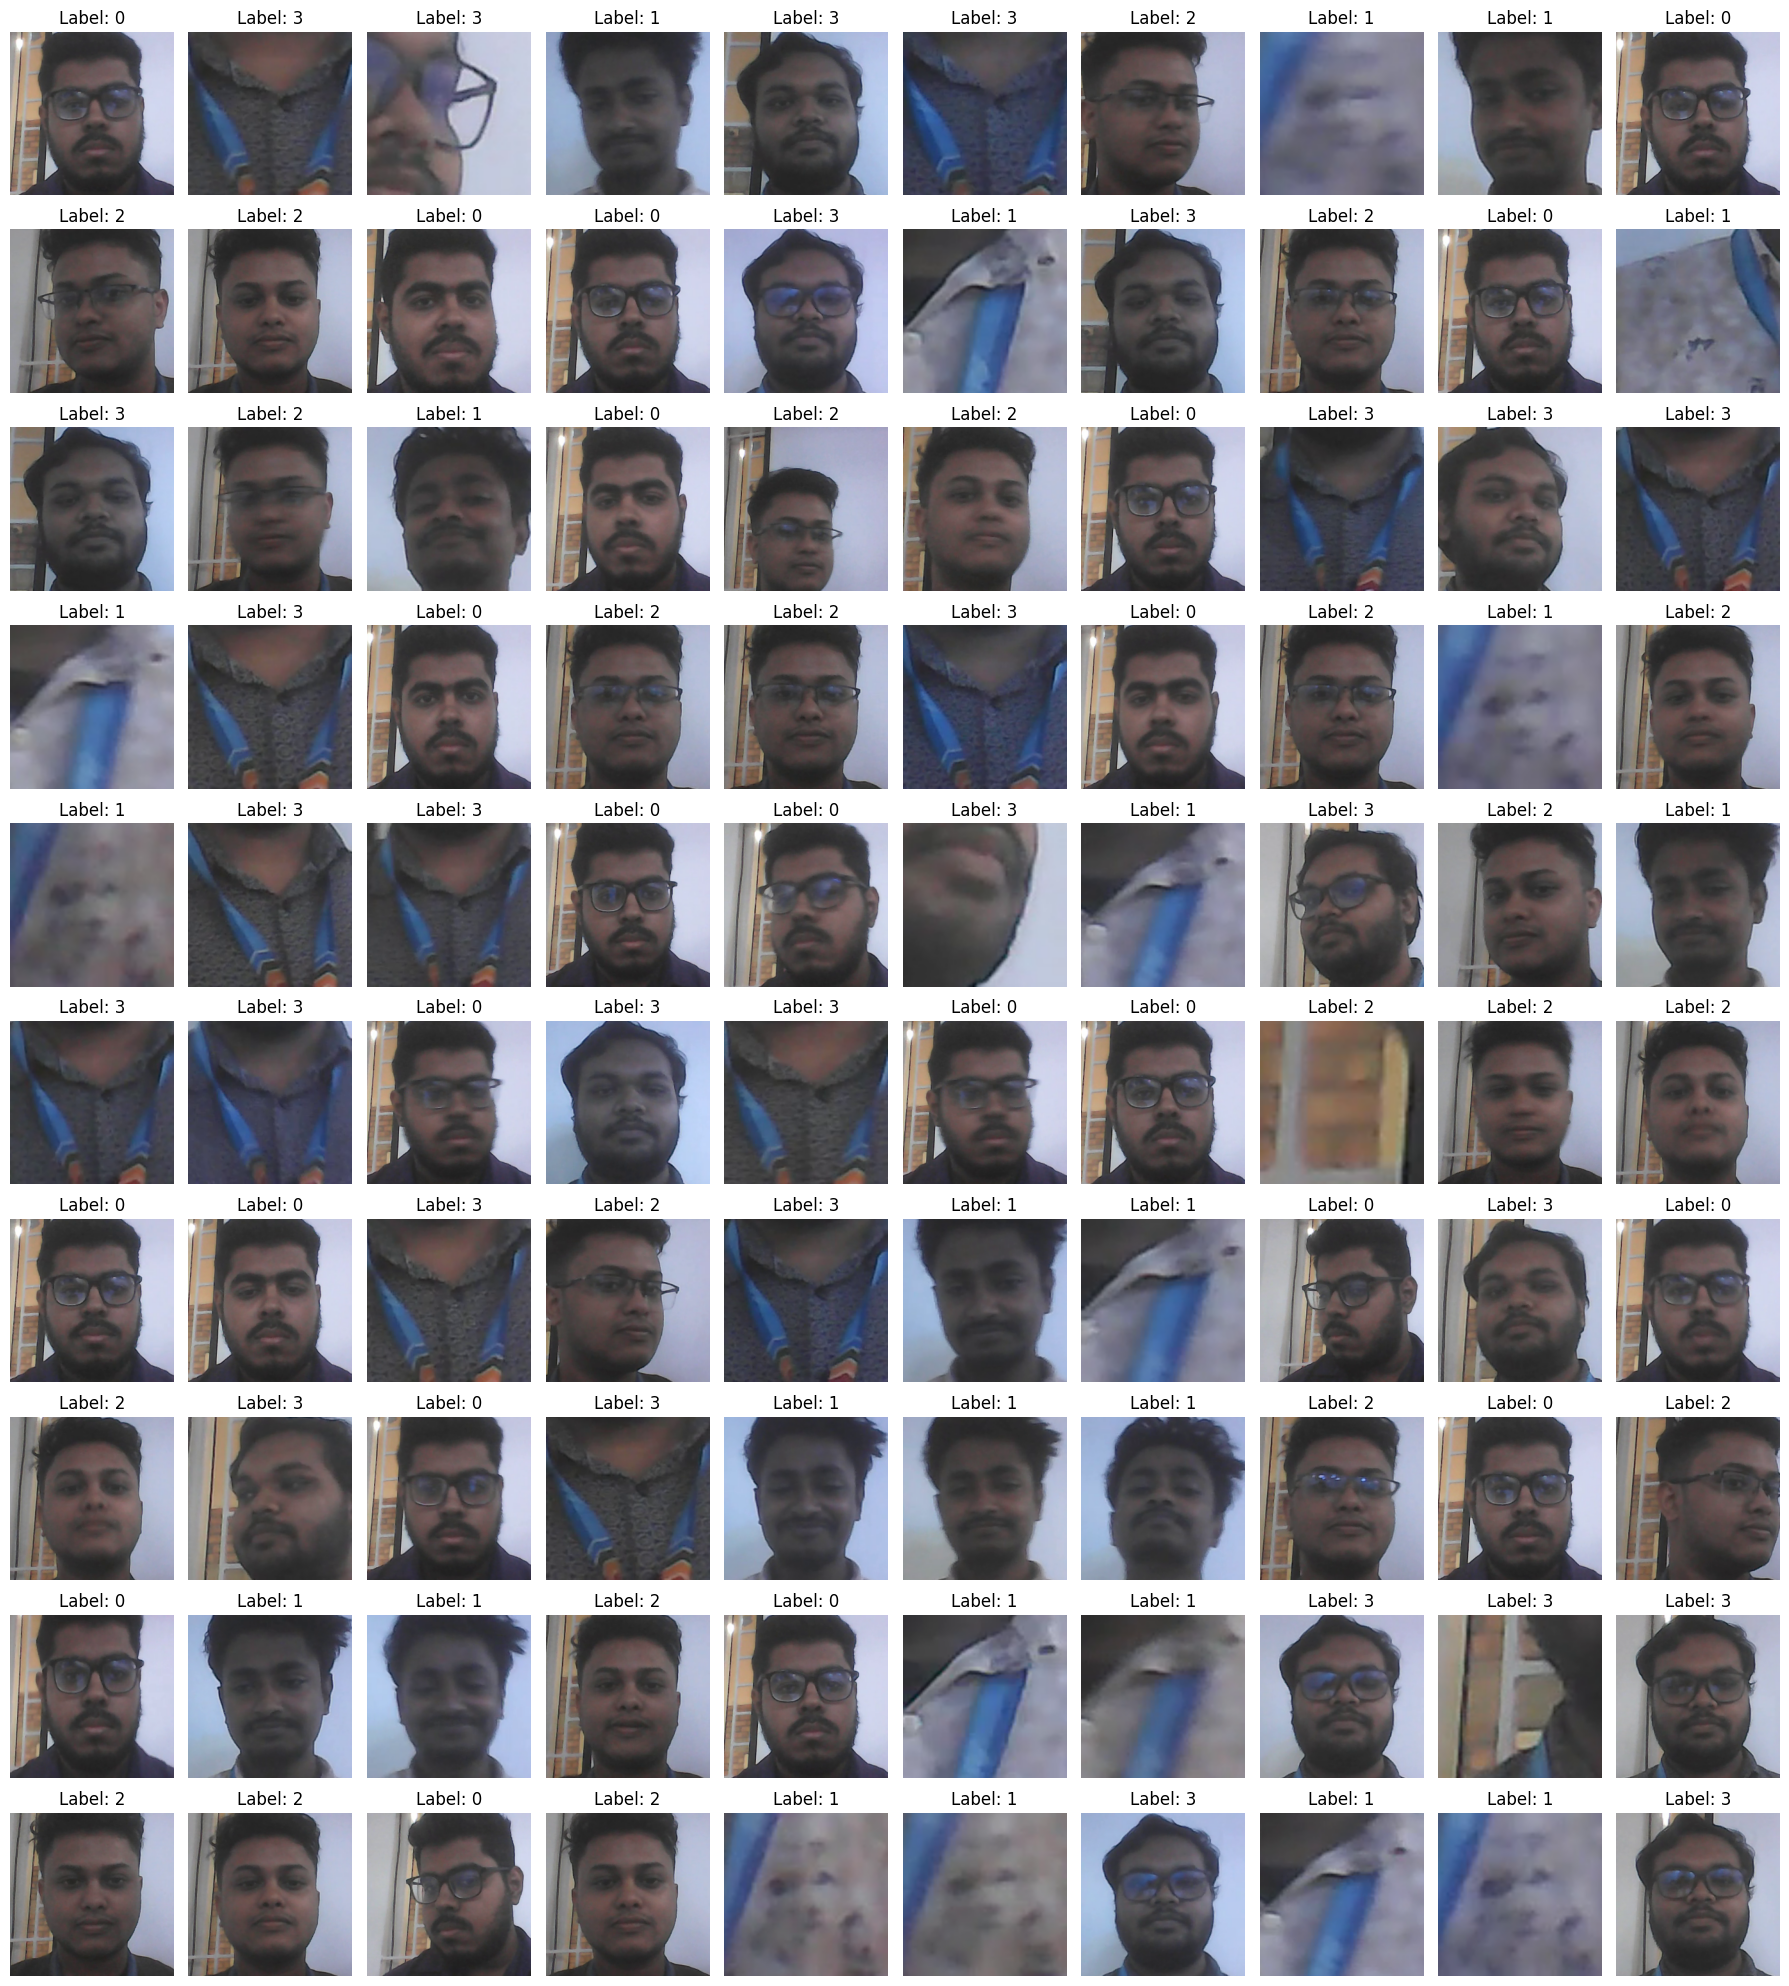

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(18, 20))

for img_array, label, ax in zip(train_imgs, train_labels, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pickle

with open('/content/drive/MyDrive/data.pkl', 'wb') as f:
    pickle.dump(data, f)

print("Data has been pickled successfully!")

Data has been pickled successfully!
